In [1]:
import fingerprint as fp


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
s_all=fp.read_pickle("struct_all.pickle")


In [4]:
import pandas as pd
import tqdm


In [5]:
s250=s_all[0:250]
f_ones_250=[fp.get_phi(s250[i],obser="ones",rmax=12,delta=0.05) for i in tqdm.tqdm_notebook(range(len(s250)))]
f_Z_250=[fp.get_phi(s250[i],obser="Z",rmax=12,delta=0.05) for i in tqdm.tqdm_notebook(range(len(s250)))]
f_Chi_250=[fp.get_phi(s250[i],obser="Chi",rmax=12,delta=0.05) for i in tqdm.tqdm_notebook(range(len(s250)))]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

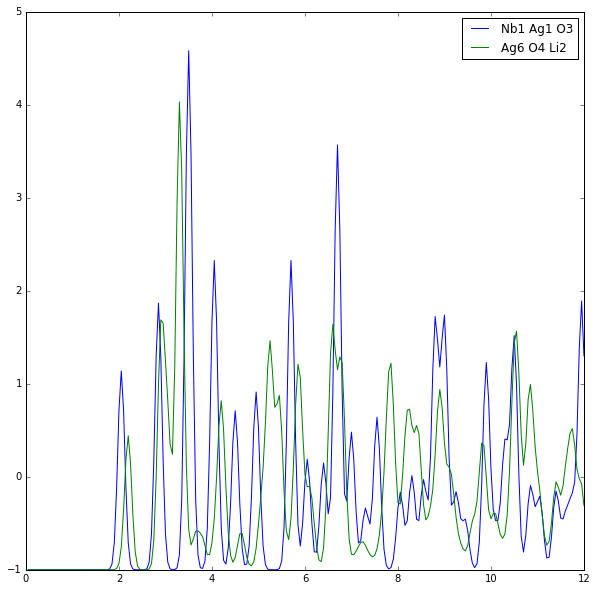

In [12]:
plt.figure(figsize=(10,10))
r=np.linspace(0.05,12,(12/0.05))
for i in range(2):
    lab=s250[i].composition
    plt.plot(r,f_Z_250[i],label=lab)
plt.legend()

In [14]:
df_ones=pd.DataFrame(f_ones_250)

In [15]:
metric_ones=np.array([np.dot(f_ones_250[i],f_ones_250[j]) for i in range(250) for j in range(250)]).reshape(250,250)

In [16]:
metric_Z=np.array([np.dot(f_ones_250[i],f_ones_250[j]) for i in range(250) for j in range(250)]).reshape(250,250)

In [17]:
dist=np.array([np.dot(f_ones_250[0],f_ones_250[i]) for i in range(250)])

In [18]:
df_ones=pd.DataFrame({"phi_ones":f_ones_250})

In [19]:
df_ones["dist"]=dist

dt_sort=df_ones.sort("dist").drop("dist",axis=1)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [20]:
comps=[s250[i].composition for i in range(250)]

In [21]:
df_ones["Composition"]=comps

In [22]:
dt_sort=df_ones.sort("dist",ascending=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [23]:
dt_sort.set_index(np.arange(dt_sort.shape[0]),inplace=True)

In [24]:
for i in range(5):
    print dt_sort["Composition"][i]

Nb1 Ag1 O3
Ni1 Ag1 F3
Mg1 Ag1 F3
Zn1 Ag1 F3
S2 Bi1 Ag1


In [25]:
sorted_f_ones=dt_sort['phi_ones'].values

In [26]:
metric_ones=np.array([np.dot(sorted_f_ones[i],sorted_f_ones[j]) for i in range(250) for j in range(250)]).reshape(250,250)

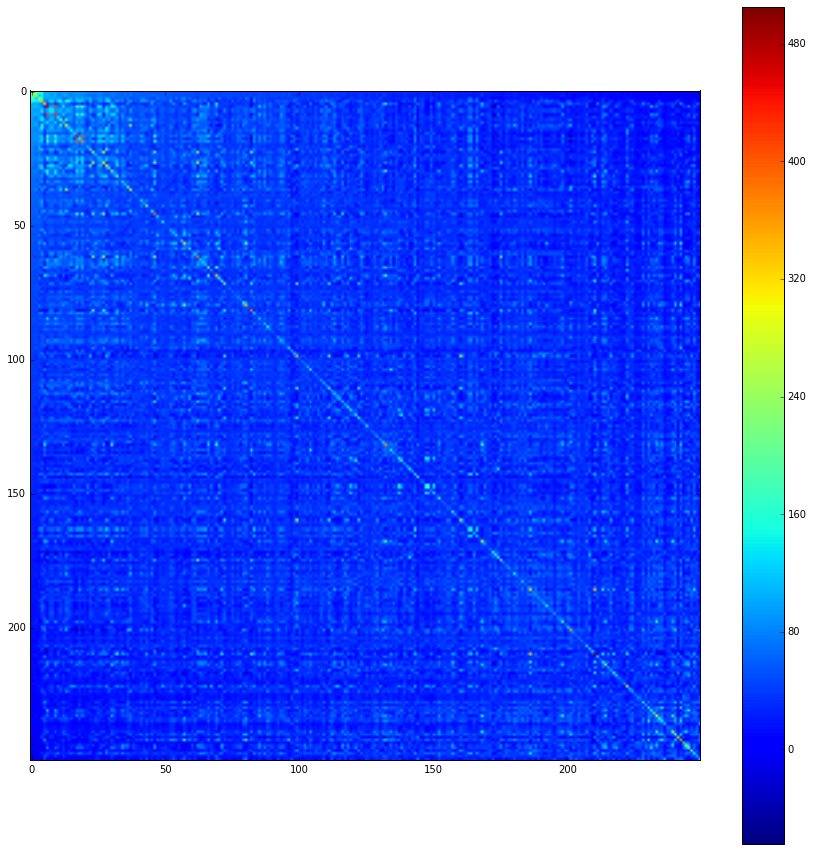

In [27]:
#for i in range(250):    
#    metric_ones[i][i]=0
plt.figure(figsize=(15,15))
plt.imshow(metric_ones[0:250,0:250])
plt.colorbar()

In [73]:
import sklearn

In [74]:
from sklearn.metrics.pairwise import euclidean_distances

In [79]:
euclid=np.array([np.sqrt(np.dot(sorted_f_ones[i],sorted_f_ones[i])+np.dot(sorted_f_ones[j],sorted_f_ones[j])-2*np.dot(sorted_f_ones[i],sorted_f_ones[j])) for i in tqdm.tqdm_notebook(range(250)) for j in range(250)]).reshape(250,250)

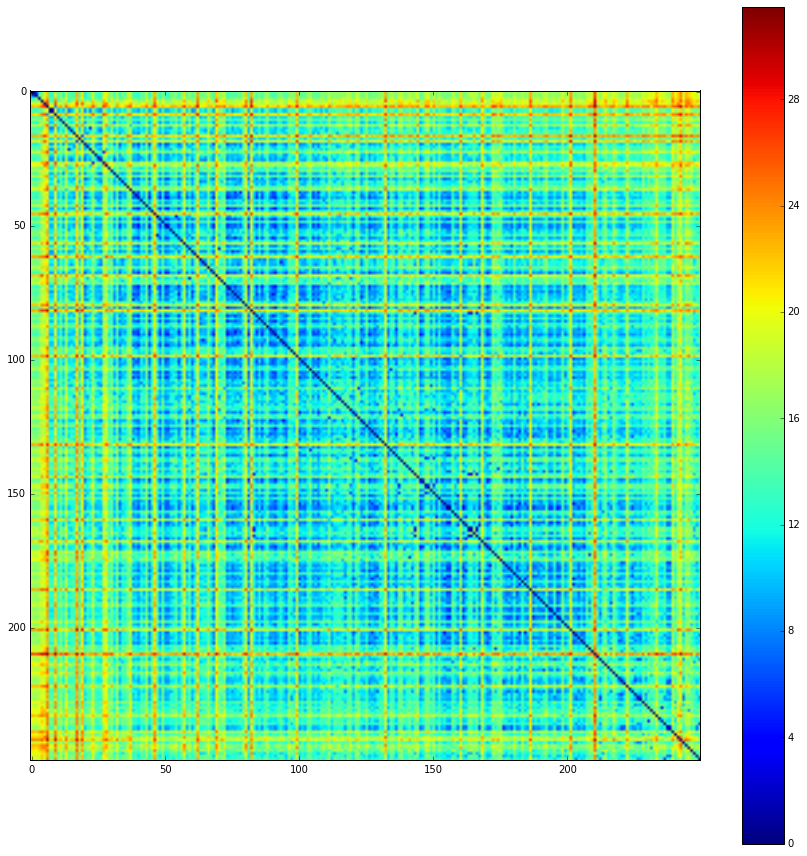

In [82]:
plt.figure(figsize=(15,15))
plt.imshow(euclid[0:250,0:250])
plt.colorbar()

In [85]:
len(s_all)

17311

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


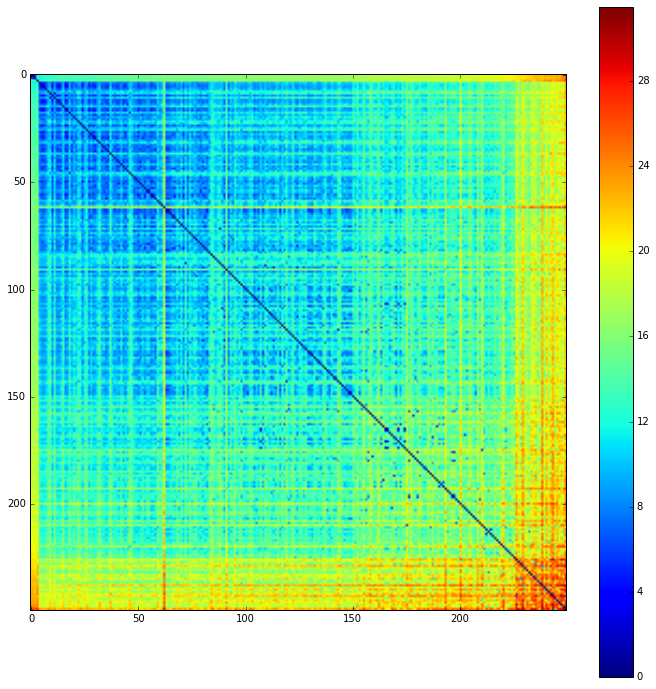

In [95]:

dist2=np.array([np.dot(f_ones_250[0]-f_ones_250[i],f_ones_250[0]-f_ones_250[i]) for i in range(250)])
df_ones["dist2"]=dist2
dt_sort=df_ones.sort("dist2").drop("dist2",axis=1)
dt_sort.set_index(np.arange(dt_sort.shape[0]),inplace=True)
sorted_f_ones=dt_sort['phi_ones'].values
euclid=np.array([np.sqrt(np.dot(sorted_f_ones[i],sorted_f_ones[i])+np.dot(sorted_f_ones[j],sorted_f_ones[j])-2*np.dot(sorted_f_ones[i],sorted_f_ones[j])) for i in tqdm.tqdm_notebook(range(250)) for j in range(250)]).reshape(250,250)
plt.figure(figsize=(12,12))
plt.imshow(euclid[0:250,0:250])
plt.colorbar()

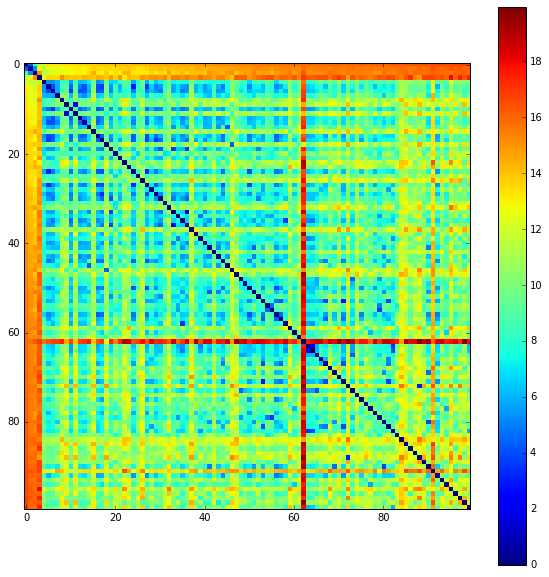

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(euclid[0:100,0:100],interpolation='nearest')
plt.colorbar()

In [96]:
dt_sort["Composition"][0:20]

0      (O, Nb, Ag)
1      (F, Ni, Ag)
2      (F, Mg, Ag)
3      (F, Zn, Ag)
4      (O, Nb, Ag)
5       (O, W, Ag)
6      (O, Te, Ag)
7      (Hf, F, Ag)
8      (S, Na, Ag)
9     (Se, Ho, Ag)
10     (O, Te, Ag)
11    (Se, Er, Ag)
12     (O, Ru, Ag)
13     (O, Nb, Ag)
14     (F, Sn, Ag)
15    (As, Nd, Ag)
16      (O, W, Ag)
17     (Ge, O, Ag)
18     (S, Bi, Ag)
19     (F, Ru, Ag)
Name: Composition, dtype: object

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


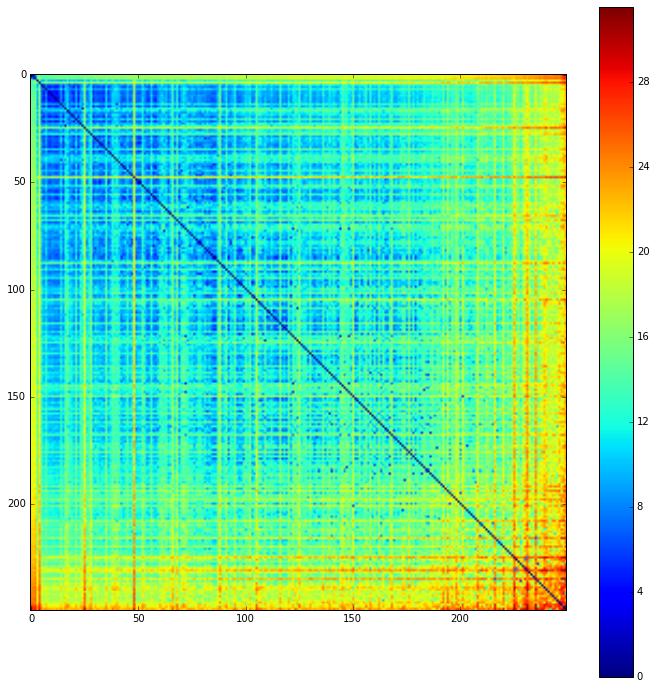

In [102]:
df_Chi=pd.DataFrame({"phi_Chi":f_Chi_250})
dist2=np.array([np.dot(f_Chi_250[0]-f_Chi_250[i],f_Chi_250[0]-f_Chi_250[i]) for i in range(250)])
df_Chi["dist2"]=dist2
dt_sort=df_Chi.sort("dist2").drop("dist2",axis=1)
dt_sort.set_index(np.arange(dt_sort.shape[0]),inplace=True)
sorted_f_ones=dt_sort['phi_Chi'].values
euclid=np.array([np.sqrt(np.dot(sorted_f_ones[i],sorted_f_ones[i])+np.dot(sorted_f_ones[j],sorted_f_ones[j])-2*np.dot(sorted_f_ones[i],sorted_f_ones[j])) for i in tqdm.tqdm_notebook(range(250)) for j in range(250)]).reshape(250,250)
plt.figure(figsize=(12,12))
plt.imshow(euclid[0:250,0:250])
plt.colorbar()

In [103]:
from sklearn.cluster import KMeans

In [104]:
s250=s_all[0:2000]
f_ones_2000=[fp.get_phi(s250[i],obser="ones",rmax=12,delta=0.05) for i in tqdm.tqdm_notebook(range(len(s250)))]

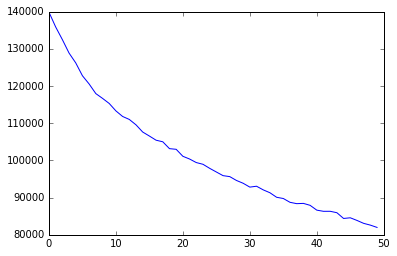

In [111]:
inertia=np.zeros(50,dtype=float)
for i in tqdm.tqdm_notebook(range(50)):
    Km=KMeans(n_clusters=5+i)
    Km.fit_predict(f_ones_2000)
    inertia[i]=Km.inertia_
plt.plot(inertia)



/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


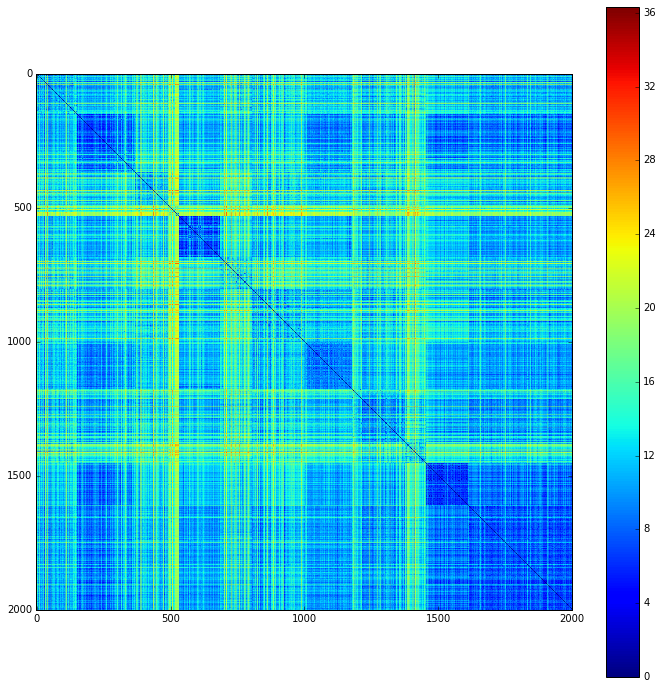

In [108]:
comps=[s250[i].composition for i in range(2000)]
df_ones=pd.DataFrame({"phi_ones":f_ones_2000})
df_ones["cluster"]=clust
df_ones["Composition"]=comps
df_sorted=df_ones.sort("cluster")
sorted_f_ones=df_sorted['phi_ones'].values
euclid=np.array([np.sqrt(np.dot(sorted_f_ones[i],sorted_f_ones[i])+np.dot(sorted_f_ones[j],sorted_f_ones[j])-2*np.dot(sorted_f_ones[i],sorted_f_ones[j])) for i in tqdm.tqdm_notebook(range(2000)) for j in range(2000)]).reshape(2000,2000)
plt.figure(figsize=(12,12))
plt.imshow(euclid)
plt.colorbar()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


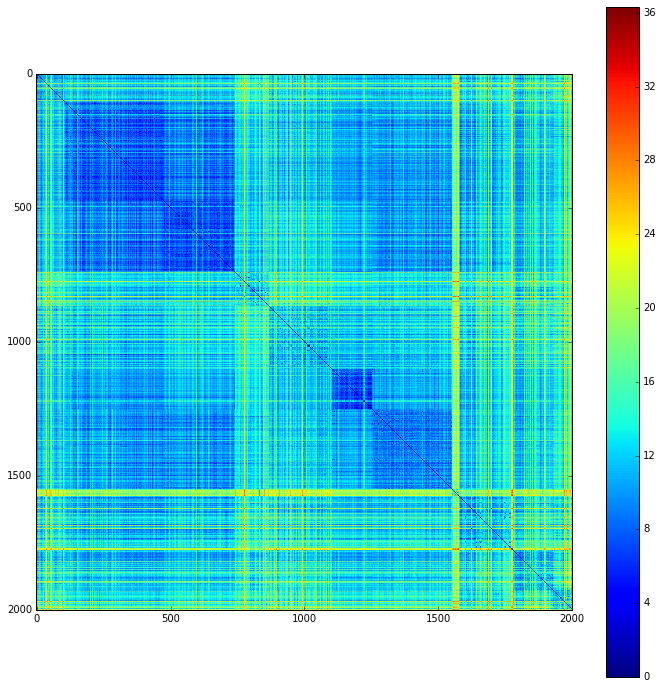

In [136]:
Km=KMeans(n_clusters=12)
clust=Km.fit_predict(f_ones_2000)
comps=[s250[i].composition.formula for i in range(2000)]
df_ones=pd.DataFrame({"phi_ones":f_ones_2000})
df_ones["cluster"]=clust
df_ones["Composition"]=comps
df_sorted=df_ones.sort("cluster")
df_sorted.set_index(np.arange(2000))
sorted_f_ones=df_sorted['phi_ones'].values
euclid=np.array([np.sqrt(np.dot(sorted_f_ones[i],sorted_f_ones[i])+np.dot(sorted_f_ones[j],sorted_f_ones[j])-2*np.dot(sorted_f_ones[i],sorted_f_ones[j])) for i in tqdm.tqdm_notebook(range(2000)) for j in range(2000)]).reshape(2000,2000)
plt.figure(figsize=(12,12))
plt.imshow(euclid)
plt.colorbar()


In [139]:
df_sorted=df_sorted.set_index(np.arange(2000))
df_sorted

phi_ones  cluster  \
0     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
1     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
2     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
3     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
4     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
5     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
6     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
7     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
8     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
9     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
10    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
11    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
12    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
13    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
14    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
15    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
16    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
17    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
18    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
19    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
20    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
21    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
22    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
23    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
24    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
25    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
26    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
27    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
28    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
29    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....        0   
...                                                 ...      ...   
1970  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1971  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1972  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1973  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1974  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1975  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1976  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1977  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1978  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1979  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1980  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1981  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1982  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1983  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1984  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1985  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1986  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1987  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1988  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1989  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1990  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1991  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1992  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1993  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1994  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1995  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1996  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....       11   
1997  [-1.0, -1.0, -1.0, -1.0, -1.0

In [144]:
df_sorted[df_sorted["cluster"]==3]["Composition"]

739      La20 B20 C20
740        Sc1 Co3 B2
741         Fe2 B2 O6
742        U4 As2 Se2
743        Ho1 Co3 B2
744       Mg2 Cu2 As2
745       Yb2 Cu2 As4
746       Rb2 Ca2 As2
747        Sm4 As4 S4
748         Sm2 B4 C4
749       Mg8 Cu8 As8
750       Er2 Cu2 As4
751       Li6 Mn2 As4
752       Tm4 Ni2 As4
753        Al1 Mo1 O3
754        U2 As4 Pd2
755       Tm2 Cu2 As4
756        Eu1 As1 O3
757        Ce4 As4 S4
758       Ho4 Ni2 As4
759        Y2 Cu2 As4
760       Ge1 Te4 As2
761        Tm1 Co3 B2
762        Er1 Co3 B2
763         Cr2 B2 O6
764       Dy2 Cu2 As4
765        U2 Cu4 As5
766         Ca2 B4 C4
767        U2 Co2 As4
768        Yb1 Co3 B2
            ...      
839        Ce4 Ag4 P8
840     Tl4 Ag32 Te22
841        Tb5 Ag1 S8
842       Cs4 Ag8 I12
843        Sm2 Ag2 O5
844        Sr1 Ag1 O3
845       Tb2 Ag2 Se4
846      In6 Ag6 Te12
847       Ho2 Ag2 Se4
848        Pr5 Ag1 S8
849        Ag2 Bi2 S4
850       Ag2 Bi2 Se4
851       Ag9 Te4 Br3
852        Cu1 Ag1 F3
853       